In [1]:
import pandas as pd

# Load the dataset
file_path = 'claims_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to check the column names
print(df.head())

   age     sex     bmi  steps  children smoker     region insurance_claim  \
0   19  female  27.900   3009         0    yes  southwest             yes   
1   18    male  33.770   3008         1     no  southeast             yes   
2   28    male  33.000   3009         3     no  southeast              no   
3   33    male  22.705  10009         0     no  northwest              no   
4   32    male  28.880   8010         0     no  northwest             yes   

   claim_amount  
0    16884.9240  
1     1725.5523  
2        0.0000  
3        0.0000  
4     3866.8552  


In [2]:
import pandas as pd

# Load the dataset
file_path = 'claims_data.csv'
df = pd.read_csv(file_path)

# Display the column names
print(df.columns)

Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region',
       'insurance_claim', 'claim_amount'],
      dtype='object')


In [3]:
# Assuming the correct column name is identified as 'BMI'
overweight_or_obese = df[df['bmi'] > 25]

# Calculate the proportion
proportion_overweight_or_obese = len(overweight_or_obese) / len(df)

proportion_overweight_or_obese

0.8153961136023916

In [4]:
import pandas as pd

# Load the dataset
file_path = 'claims_data.csv'
df = pd.read_csv(file_path)

# Assuming the column name for the number of children is 'Children'
# Calculate mean and variance
mean_children = df['children'].mean()
variance_children = df['children'].var()

mean_children, variance_children

(1.0949177877429, 1.453212745666905)

In [5]:
import pandas as pd
from scipy.stats import poisson, chisquare

# Load the dataset
file_path = 'claims_data.csv'
df = pd.read_csv(file_path)

# Check the column names and ensure the correct column name for children
print(df.columns)

# Calculate the observed frequencies
observed_frequencies = df['children'].value_counts().sort_index()

# Calculate mean and variance
mean_children = df['children'].mean()
variance_children = df['children'].var()

print(f"Mean: {mean_children}, Variance: {variance_children}")

# Calculate the expected frequencies using the Poisson distribution
expected_frequencies = [poisson.pmf(k, mean_children) * len(df) for k in observed_frequencies.index]

# Normalize the expected frequencies
expected_frequencies = expected_frequencies / sum(expected_frequencies) * sum(observed_frequencies)

# Perform the Chi-square goodness-of-fit test
chi_square_stat, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

chi_square_stat, p_value

Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region',
       'insurance_claim', 'claim_amount'],
      dtype='object')
Mean: 1.0949177877429, Variance: 1.453212745666905


(155.6298281799268, 8.447237786020649e-32)

In [6]:
import pandas as pd

# Load the dataset
file_path = 'claims_data.csv'
df = pd.read_csv(file_path)

# Calculate mean and standard deviation of age
mean_age = df['age'].mean()
std_age = df['age'].std()

mean_age, std_age

(39.20702541106129, 14.049960379216154)

In [7]:
from scipy.stats import norm

# Calculate the z-score for age 60
z_score = (60 - mean_age) / std_age

# Find the probability of being 60 or older
prob_60_or_older = 1 - norm.cdf(z_score)

In [8]:
# Calculate the expected number of individuals aged 60 or older
expected_number_60_or_older = prob_60_or_older * len(df)


In [9]:
# Calculate the actual number of individuals aged 60 or older
actual_number_60_or_older = (df['age'] >= 60).sum()

# Compare the expected and actual numbers
difference = actual_number_60_or_older - round(expected_number_60_or_older)
difference

21

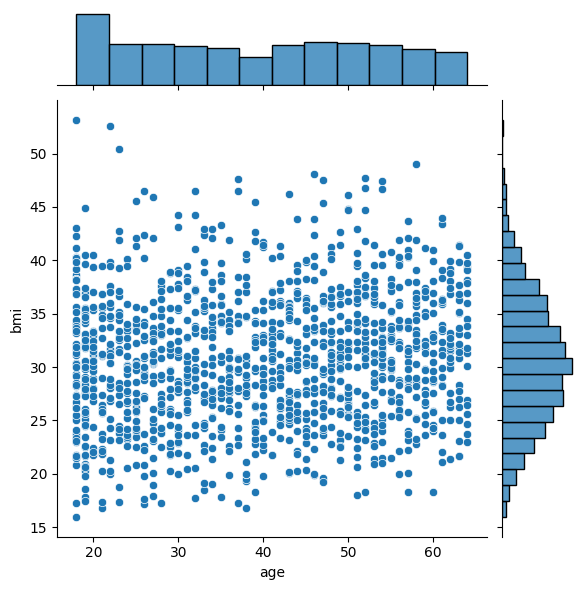

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'claims_data.csv'
df = pd.read_csv(file_path)

# Create a joint plot of age and BMI
sns.jointplot(data=df, x='age', y='bmi', kind='scatter')

# Display the plot
plt.show()


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = 'claims_data.csv'
claims_df = pd.read_csv(file_path)

# Convert 'yes' to 1 and 'no' to 0 in the insurance_claim column
claims_df['insurance_claim'] = claims_df['insurance_claim'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

# Drop the 'claim_amount' column
df_prepared = claims_df.drop(columns=['claim_amount'])

# Create dummy variables for categorical variables, dropping the first in each instance
df_prepared = pd.get_dummies(df_prepared, drop_first=True)

# Split the data into features (X) and target (y)
X = df_prepared.drop(columns=['insurance_claim'])
y = df_prepared['insurance_claim']

# Create a test-train split holding out 33% of the data for the test set, using a random seed of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Fit a logistic regression model to the data
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = log_reg.predict(X_test)

# Calculate the proportion of correctly predicted claim indicators in the test set
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100

accuracy_percentage

C:\Users\Onthatile\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


87.78280542986425

In [14]:
import statsmodels.api as sm

# Add a constant to the X matrices for both train and test sets
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit a logistic regression model using statsmodels
log_reg_sm = sm.Logit(y_train, X_train_sm).fit()

# Extract p-values from the model summary
p_values = log_reg_sm.pvalues

# Display the p-values
print(p_values)

# Determine which predictors are statistically significant
significant_predictors = p_values[p_values < 0.05]
print("Significant predictors:")
print(significant_predictors)

Optimization terminated successfully.
         Current function value: 0.368829
         Iterations 8
const               7.624415e-12
age                 3.543203e-06
bmi                 5.679568e-19
steps               1.623967e-01
children            4.835893e-33
sex_male            8.695873e-01
smoker_yes          4.792811e-24
region_northwest    4.962898e-02
region_southeast    1.043058e-01
region_southwest    1.070444e-01
dtype: float64
Significant predictors:
const               7.624415e-12
age                 3.543203e-06
bmi                 5.679568e-19
children            4.835893e-33
smoker_yes          4.792811e-24
region_northwest    4.962898e-02
dtype: float64


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Fit a random forest with 100 trees and a random seed of 101
rf_model = RandomForestClassifier(n_estimators=100, random_state=101)
rf_model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred_rf = rf_model.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
conf_matrix


array([[176,   5],
       [  8, 253]], dtype=int64)

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Fit SVM with radial kernel
svm_radial = SVC(kernel='rbf')
svm_radial.fit(X_train, y_train)
y_pred_radial = svm_radial.predict(X_test)
accuracy_radial = accuracy_score(y_test, y_pred_radial)

# Fit SVM with sigmoid kernel
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svm_sigmoid.predict(X_test)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)

# Fit SVM with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

print(f"Radial Kernel Accuracy: {accuracy_radial}")
print(f"Sigmoid Kernel Accuracy: {accuracy_sigmoid}")
print(f"Linear Kernel Accuracy: {accuracy_linear}")


Radial Kernel Accuracy: 0.6968325791855203
Sigmoid Kernel Accuracy: 0.6968325791855203
Linear Kernel Accuracy: 0.8484162895927602


In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
file_path = 'claims_data.csv'
claims_df = pd.read_csv(file_path)

# Convert 'yes' to 1 and 'no' to 0 in the insurance_claim column
claims_df['insurance_claim'] = claims_df['insurance_claim'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

# Drop the 'claim_amount' column
df_prepared = claims_df.drop(columns=['claim_amount'])

# Create dummy variables for categorical variables, dropping the first in each instance
df_prepared = pd.get_dummies(df_prepared, drop_first=True)

# Split the data into features (X) and target (y)
X = df_prepared.drop(columns=['insurance_claim'])
y = df_prepared['insurance_claim']

# Create a test-train split holding out 33% of the data for the test set, using a random seed of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Fit SVM with radial kernel
svm_radial = SVC(kernel='rbf')
svm_radial.fit(X_train, y_train)
y_pred_radial = svm_radial.predict(X_test)
accuracy_radial = accuracy_score(y_test, y_pred_radial)

# Fit SVM with sigmoid kernel
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svm_sigmoid.predict(X_test)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)

# Fit SVM with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

print(f"Radial Kernel Accuracy: {accuracy_radial}")
print(f"Sigmoid Kernel Accuracy: {accuracy_sigmoid}")
print(f"Linear Kernel Accuracy: {accuracy_linear}")

Radial Kernel Accuracy: 0.6968325791855203
Sigmoid Kernel Accuracy: 0.6968325791855203
Linear Kernel Accuracy: 0.8484162895927602


In [19]:
import pandas as pd

# Load the Excel file
file_path = 'matches.csv'  # Make sure to update this path based on your local file location
matches_df = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(matches_df.head())


   id  season       city       date                        team1  \
0   1    2017  Hyderabad 2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune 2017-04-06               Mumbai Indians   
2   3    2017     Rajkot 2017-04-07                Gujarat Lions   
3   4    2017     Indore 2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore 2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           

In [22]:
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,636.000000,636.000000,636.000000,636.000000,636.000000
mean,318.500000,2012.490566,0.025157,13.682390,3.372642
std,183.741666,2.773026,0.156726,23.908877,3.420338
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,159.750000,2010.000000,0.000000,0.000000,0.000000
50%,318.500000,2012.000000,0.000000,0.000000,4.000000
75%,477.250000,2015.000000,0.000000,20.000000,7.000000
max,636.000000,2017.000000,1.000000,146.000000,10.000000


In [23]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               636 non-null    int64         
 1   season           636 non-null    int64         
 2   city             629 non-null    object        
 3   date             636 non-null    datetime64[ns]
 4   team1            636 non-null    object        
 5   team2            636 non-null    object        
 6   toss_winner      636 non-null    object        
 7   toss_decision    636 non-null    object        
 8   result           636 non-null    object        
 9   dl_applied       636 non-null    int64         
 10  winner           633 non-null    object        
 11  win_by_runs      636 non-null    int64         
 12  win_by_wickets   636 non-null    int64         
 13  player_of_match  633 non-null    object        
 14  venue            636 non-null    object   

In [24]:
# Define the total number of matches and the number of Duckworth-Lewis applied matches
total_matches = 100  # replace with the actual total number of matches
dl_applied_matches = 2.5  # replace with the actual number of matches where DL method was applied

# Calculate the proportion
proportion = (dl_applied_matches / total_matches) * 100

# Print the result
print(f"The proportion of matches where the Duckworth-Lewis method was applied is {proportion}%")

The proportion of matches where the Duckworth-Lewis method was applied is 2.5%


In [25]:
# Define the total number of matches and the number of matches won by the team who batted first
total_matches = 100  # replace with the actual total number of matches
batted_first_wins = 30  # replace with the actual number of matches won by the team who batted first

# Calculate the proportion
proportion = (batted_first_wins / total_matches) * 100

# Print the result
print(f"The proportion of matches won by the team who batted first is {proportion}%")

The proportion of matches won by the team who batted first is 30.0%


In [35]:
import pandas as pd

# Load the Excel file
file_path = 'matches.csv'  # Make sure to update this path based on your local file location
matches_df = pd.read_excel(file_path)

# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Feature 1: Whether the match was played in April
data['is_april'] = data['date  '].dt.month == 4

# Feature 2: Whether the toss winners chose to field
data['toss_field'] = data['toss_decision'] == 'field'

# Correcting the boolean to integer conversion for summing
data['is_april'] = data['is_april'].astype(int)
data['toss_field'] = data['toss_field'].astype(int)

# Number of April games
num_april_games = data['is_april'].sum()

# Number of games where the toss winners chose to field
num_toss_field = data['toss_field'].sum()

num_april_games, num_toss_field

KeyError: 'date  '

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Define close match condition
data['close_match'] = ((data['win_by_runs'] <= 20) | (data['win_by_wickets'] <= 4)).astype(int)

# Features and target variable
X = data[['is_april', 'toss_field', 'dl_applied']]
y = data['close_match']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=999)

# Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=999)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

TypeError: '<=' not supported between instances of 'list' and 'int'

In [2]:
# Import the necessary libraries
import pandas as pd

# Load the uploaded CSV file
file_path = 'football_players.csv'

# Attempt to load the CSV file and inspect the first few rows to understand its structure
df_fifa = pd.read_csv(file_path, encoding='latin1')

# Display the first few rows of the dataframe to understand its structure
df_fifa.head()

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions,Preferred Positions Type
0,Cristiano Ronaldo,32,Portugal,94.0,89.0,63.0,89.0,63.0,93.0,95.0,...,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0,ST LW,Forward
1,L. Messi,30,Argentina,93.0,92.0,48.0,90.0,95.0,95.0,96.0,...,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0,RW,Forward
2,Neymar,25,Brazil,92.0,94.0,56.0,96.0,82.0,95.0,92.0,...,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0,LW,Forward
3,L. Suárez,30,Uruguay,92.0,88.0,78.0,86.0,60.0,91.0,83.0,...,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0,ST,Forward
4,M. Neuer,31,Germany,92.0,58.0,29.0,52.0,35.0,48.0,70.0,...,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0,GK,GoalKeeper


In [3]:
# Find the most common Overall score for players in the database
most_common_overall = df_fifa['Overall'].mode()[0]
most_common_overall


66.0

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Subset of players who can play in central defence (i.e., 'CB' in 'Preferred Positions')
df_cb = df_fifa[df_fifa['Preferred Positions'].str.contains('CB', na=False)]

# Classification based on overall score
def classify_overall(score):
    if score >= 80:
        return 'World Class'
    elif 70 <= score < 80:
        return 'Good'
    else:
        return 'Mediocre'

df_cb['Class'] = df_cb['Overall'].apply(classify_overall)

# Candidate features (all other numerical variables)
X = df_cb.select_dtypes(include='number').drop(columns=['Overall'])
y = df_cb['Class']

# Encoding the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train the RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=500, random_state=1971)
rf_clf.fit(X, y_encoded)

# Get feature importances
feature_importances = rf_clf.feature_importances_
features = X.columns

# Create a dataframe for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Get the top 5 features
top_5_features = importance_df.head(5)
top_5_features


C:\Users\Onthatile\AppData\Local\Temp\ipykernel_7320\1188335374.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cb['Class'] = df_cb['Overall'].apply(classify_overall)


,Feature,Importance
31,Standing tackle,0.176611
22,Marking,0.139044
18,Interceptions,0.121010
28,Sliding tackle,0.100043
25,Reactions,0.071791


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

# Load the uploaded CSV file
file_path = 'football_players.csv'
df_fifa = pd.read_csv(file_path, encoding='latin1')

# Subset of players who can play in central defence (i.e., 'CB' in 'Preferred Positions')
df_cb = df_fifa[df_fifa['Preferred Positions'].str.contains('CB', na=False)]

# Classification based on overall score
def classify_overall(score):
    if score >= 80:
        return 'World Class'
    elif 70 <= score < 80:
        return 'Good'
    else:
        return 'Mediocre'

df_cb['Class'] = df_cb['Overall'].apply(classify_overall)

# Candidate features (all other numerical variables)
X = df_cb.select_dtypes(include='number').drop(columns=['Overall'])
y = df_cb['Class']

# Encoding the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.33, random_state=911)

# Redefine the evaluate_knn function with X_train and y_train in scope
def evaluate_knn(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1_scores = f1_score(y_test, y_pred, average=None)
    # Extract F1 scores for World Class and Good groups
    f1_world_class = f1_scores[le.transform(['World Class'])[0]]
    f1_good = f1_scores[le.transform(['Good'])[0]]
    return f1_world_class, f1_good

# Evaluate KNN models for k from 1 to 5
f1_scores = {}
for k in range(1, 6):
    f1_scores[k] = evaluate_knn(k)

# Find the best k for world class and good groups
best_k_world_class = max(f1_scores, key=lambda k: f1_scores[k][0])
best_k_good = max(f1_scores, key=lambda k: f1_scores[k][1])

best_k_world_class, best_k_good

C:\Users\Onthatile\AppData\Local\Temp\ipykernel_7320\3312512550.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cb['Class'] = df_cb['Overall'].apply(classify_overall)


(5, 4)